<a href="https://colab.research.google.com/github/aunghlaingtun/iti107ai/blob/main/masknshark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection using YOLO**

This is ( Mask and Shark) two objects detectons  hands-on lab. In this lab, i m going to present how to train mask and shark detection.

this exercise invloved  to:
- Create an object detection dataset in YOLO format
- Fine-tune a YOLOv8m pretrained model with the custom dataset
- Monitor the training progress and evaluation metrics
- Deploy the trained model for object detection


## Create an object detection dataset

i will use a (sample balloon) mask and shark  dataset to illustrate the process of annotation and packaging the dataset into different format for object detection with Yolo V8 (e.g. YOLO, Pascal VOC, COCO, etc).

For Assingment , to annotate job that created by manual labeling with online sercie call [Roboflow](https://roboflow.com/)


To annotate, there are many different tools available, such as the very basic [LabelImg](https://github.com/HumanSignal/labelImg) , or the more feature-packed tool such as [Label Studio](https://labelstud.io/), or online service such as [Roboflow](https://roboflow.com/).

### Raw Image Dataset

provide dataset to  download the sharkandmask images (without annotations) from my git link:



```
*   https://github.com/aunghlaingtun/iti107ai/ram/main/24Dec_Data.zip
```


### My Raw Image Dataset
https://github.com/aunghlaingtun/iti107ai/ram/main/24Dec_Data.zip



Unzip the file to a local folder.

There are total of 74 images. You should divide the images into both training and validation set (e.g. 80%-20%, i.e. 59 images for train, and 15 for tes

tun my *data*


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data uploading

*  Step 1: Mount Google Drive
*  Step 2: Change directory to your Google Drive folder
*  Step 3: Download the ZIP file from GitHub
*  Step 4: Create a directory and unzip the file



In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Change directory to your Google Drive folder
%cd /content/drive/MyDrive/26Dec

# Step 3: Download the ZIP file from GitHub
!wget https://github.com/aunghlaingtun/iti107ai/raw/main/24Dec_Data.zip -O 24Dec_Data.zip

# Step 4: Create a directory and unzip the file
!mkdir -p /content/drive/MyDrive/26Dec/dataset26

!unzip /content/drive/MyDrive/26Dec/24Dec_Data.zip -d dataset26/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/26Dec
--2024-12-26 14:19:06--  https://github.com/aunghlaingtun/iti107ai/raw/main/24Dec_Data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aunghlaingtun/iti107ai/main/24Dec_Data.zip [following]
--2024-12-26 14:19:06--  https://raw.githubusercontent.com/aunghlaingtun/iti107ai/main/24Dec_Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22297957 (21M) [application/zip]
Saving to: ‘24Dec_Data.zip’

24Dec_Data.zip      100%[=============

In [ ]:
import os
dataset_path = '/content/drive/MyDrive/26Dec'  # Replace 'my_folder' with my  actual folder name

# Check if the folder exists there was name test_folder
if os.path.exists(dataset_path):
    print(f"Folder '{dataset_path}' found!")
else:
    print(f"Folder '{dataset_path}' not found. Please check the path.")

Folder '/content/drive/MyDrive/26Dec' found!


In [ ]:
!ls -la /content/drive/MyDrive/26Dec/dataset26/valid/images | wc -l

42


In [ ]:
%%capture
!pip install ultralytics
!pip install comet_ml

Setup the logging
Ultralytics support logging to wandb, comet.ml and tensorboard, out of the box. Here we only enable wandb.

in order to get the API key,need to create an account at wandb from https://wandb.ai/authorize.


In [ ]:
from ultralytics import settings

settings.update({"wandb": True,
                 #"comet.ml": False,
                 "tensorboard": False})

### Training

i specify the path to `data.yaml` file, and train with a batch size of 15, and i  also save the checkpoint at each epoch (save_period=2).i am connected to a GPU, hence can specify the device to use as `device=0` to select the first GPU.  i  specify the project name as `**Assingmet107**`, this will create a folder called `Dec26` to store the weights and various training artifacts such as F1, PR curves, confusion matrics, training results (loss, mAP, etc).

For a complete listing of train settings, provided [here](https://docs.ultralytics.com/modes/train/#train-settings).

Specify the type of data [augmentation](https://docs.ultralytics.com/modes/train/#augmentation-settings-and-hyperparameters)  thaat for  as part of the train pipeline.

Model can monitoing of  training progress at wandb (the link is given in the train output below)


In [ ]:
!ls -la /content/drive/MyDrive/26Dec/dataset26/valid/images | wc -l

42


In [ ]:
!ls -l     | wc -l

4


## Training the Model

YOLOv8 comes with different sizes of pretrained models: yolov8n, yolov8s, .... They differs in terms of their sizes, inference speeds and mean average precision:

<img src="https://github.com/nyp-sit/iti107-2024S2/blob/main/assets/yolo-models.png?raw=true" width="70%"/>


i will use the small pretrained model yolo8m as final model  and finetune it on my dataset.

**Selected yolov8m that for pre-trained yolo model to used**.

In [ ]:
from ultralytics import YOLO
from ultralytics import settings


model = YOLO("/content/drive/MyDrive/26Dec/yolov8m.pt")  # Load a pre-trained YOLO model

result = model.train(
    data="/content/drive/MyDrive/26Dec/dataset26/data.yaml",
    epochs=120,  # Slightly increased
    lr0=0.0005,  # Fine-tuned learning rate
    save_period=2,
    batch=32,
    device=0,
    project='Assingmet107',
    augment=True,
     #optimize_anchors=True,
     #iou_thres=0.75,
    plots=True
)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/26Dec/yolov8m.pt, data=/content/drive/MyDrive/26Dec/dataset26/data.yaml, epochs=120, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=Assingmet107, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 68.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/26Dec/dataset26/train/labels... 429 images, 0 backgrounds, 0 corrupt: 100%|██████████| 429/429 [00:02<00:00, 148.74it/s]


train: New cache created: /content/drive/MyDrive/26Dec/dataset26/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/26Dec/dataset26/valid/labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 104.63it/s]


val: New cache created: /content/drive/MyDrive/26Dec/dataset26/valid/labels.cache
Plotting labels to Assingmet107/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Assingmet107/train
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      13.3G      1.731      3.526      1.941         50        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all         41         96      0.407      0.452      0.352      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      13.5G      1.607      1.924      1.771         55        640: 100%|██████████| 14/14 [00:12<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         41         96      0.047      0.243      0.049     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      13.5G      1.644      1.784      1.792         44        640: 100%|██████████| 14/14 [00:12<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         41         96       0.01       0.18    0.00607    0.00163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      13.6G      1.718      1.744      1.824         47        640: 100%|██████████| 14/14 [00:12<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         41         96    0.00498      0.171    0.00394    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      13.6G      1.634      1.592       1.76         27        640: 100%|██████████| 14/14 [00:13<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96     0.0821      0.532     0.0604     0.0231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      13.6G      1.665      1.581      1.795         38        640: 100%|██████████| 14/14 [00:13<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         41         96   0.000292     0.0571   0.000118   2.36e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      13.6G      1.656      1.564      1.761         46        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         41         96      0.202      0.452      0.134     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      13.6G      1.674      1.563      1.812         38        640: 100%|██████████| 14/14 [00:14<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         41         96     0.0273      0.239     0.0274    0.00753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      13.5G      1.615      1.513       1.77         55        640: 100%|██████████| 14/14 [00:14<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         41         96     0.0954      0.244      0.067     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      13.5G      1.646      1.476       1.81         35        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.433      0.324      0.361      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      13.5G      1.612      1.376      1.735         52        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.249       0.34      0.263     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      13.5G      1.597      1.402      1.719         38        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96       0.24      0.431      0.186     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      13.6G      1.558      1.342      1.718         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.442      0.432      0.378      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      13.5G      1.462      1.249      1.642         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.418       0.37      0.271       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      13.5G       1.47      1.302      1.667         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.475      0.534      0.502      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      13.5G      1.468      1.188      1.614         26        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96      0.487      0.606      0.495      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      13.5G      1.432      1.139      1.608         35        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.603      0.535      0.533      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      13.5G      1.469      1.195      1.617         32        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.442      0.314        0.3      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      13.6G       1.39      1.093      1.575         56        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.593      0.685      0.689      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      13.5G      1.346      1.047      1.534         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.433      0.517      0.437       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      13.5G      1.357      1.036      1.526         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.691      0.533      0.579      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      13.5G      1.394      1.081      1.573         38        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.705      0.566      0.637      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      13.5G      1.337       1.03      1.531         35        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.715      0.593       0.65      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      13.5G      1.321       1.01      1.523         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.516      0.771      0.585      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      13.5G      1.275     0.9804      1.483         55        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.601      0.585      0.536      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      13.5G      1.294     0.9933      1.488         39        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.665      0.661      0.642      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      13.5G      1.265     0.9135      1.459         39        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.764      0.589      0.671       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      13.6G      1.339     0.9304      1.491         59        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.753       0.54       0.63      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      13.6G      1.278     0.9283       1.47         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.567      0.513       0.48       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      13.6G      1.184     0.8721      1.394         52        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.718      0.625       0.66      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      13.6G      1.241     0.8897       1.43         36        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.701      0.611       0.62      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      13.6G       1.22     0.8662      1.409         45        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.803      0.609      0.692      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      13.5G      1.215      0.837      1.415         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.709        0.7      0.671      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      13.5G      1.177     0.8136      1.406         40        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.658      0.638      0.624       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      13.5G      1.187     0.8592      1.413         37        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96      0.757      0.667      0.723      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      13.5G      1.147     0.8436      1.371         50        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.816      0.628      0.668      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      13.6G      1.132     0.7987      1.337         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96       0.74      0.636       0.69      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      13.6G      1.164     0.8043      1.389         50        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.732      0.668      0.713      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      13.5G      1.098     0.7578      1.344         35        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96       0.82      0.661      0.762      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      13.6G      1.094      0.742      1.339         27        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.683      0.614       0.62      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      13.5G      1.104     0.7484      1.329         31        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.796      0.774      0.782       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      13.5G      1.084     0.7541       1.32         35        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.749      0.593      0.672      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      13.6G      1.084     0.7565      1.325         40        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.809      0.677       0.76      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      13.6G      1.093      0.782      1.347         36        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96       0.82      0.713      0.757       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      13.5G      1.085     0.7302      1.312         54        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.827      0.691      0.744      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      13.6G      1.047     0.7202      1.317         54        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96      0.732      0.688      0.726      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      13.5G      1.033     0.7012      1.284         37        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.752      0.669      0.701      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      13.5G      1.082     0.7286      1.351         42        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.652      0.589      0.589       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      13.6G      1.007     0.7093      1.287         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.781      0.671      0.741      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      13.5G     0.9891     0.6807      1.287         46        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.903      0.569       0.72      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      13.5G     0.9975     0.6586      1.249         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.813      0.678       0.73      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      13.5G      1.026     0.7053       1.29         43        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.795      0.731      0.784      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      13.5G     0.9508      0.625      1.236         56        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.798      0.615      0.683      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      13.5G     0.9867     0.6446      1.267         40        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.909      0.636      0.774      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      13.6G     0.9338      0.636      1.249         37        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.766      0.698      0.729      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      13.5G     0.9284      0.643      1.231         43        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.825      0.725      0.767      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      13.5G     0.9197     0.6285      1.232         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.811       0.67       0.75      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      13.5G     0.9366      0.619      1.215         71        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.704      0.738      0.745      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      13.5G     0.9475     0.6192      1.224         63        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.741      0.744      0.749      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      13.5G      0.923     0.6089      1.227         32        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96       0.77      0.717      0.766      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      13.5G     0.8658      0.606      1.206         39        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.823      0.649      0.755      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      13.5G     0.8667     0.5949      1.203         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96      0.776      0.697      0.758      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      13.5G     0.8736      0.576       1.18         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.802      0.652       0.74      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      13.5G      0.879     0.5982      1.217         47        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96      0.872      0.707      0.777      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      13.6G     0.9115     0.5856      1.215         42        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.753      0.785      0.794      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      13.5G     0.8779      0.569       1.19         43        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.752      0.789      0.798      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      13.6G     0.8604     0.5776      1.189         45        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.846        0.7      0.784      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      13.5G     0.8057     0.5452      1.146         46        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.763      0.694      0.794       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      13.5G     0.8266     0.5456      1.153         55        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.829      0.671      0.765      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      13.6G     0.8345     0.5398      1.148         46        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.802      0.742      0.778      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      13.5G     0.8417     0.5541       1.19         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.795      0.742      0.759      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      13.5G     0.8295     0.5399      1.155         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.788      0.664      0.725      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      13.5G     0.8178     0.5389      1.166         38        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.787       0.66      0.691      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      13.6G     0.8054     0.5266      1.143         24        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.819      0.684      0.742      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      13.5G     0.8136     0.5488      1.155         38        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.824      0.693      0.735      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      13.6G      0.776     0.5167      1.108         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.854       0.67      0.793      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      13.5G     0.7486     0.5048      1.129         54        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.836      0.667      0.744      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      13.6G     0.7998      0.535      1.159         43        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96      0.799      0.771      0.808      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      13.6G     0.8026     0.5255      1.131         55        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.903      0.708      0.767      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      13.6G      0.777     0.5129      1.124         37        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.828      0.712      0.789      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      13.5G     0.7774     0.5073      1.128         42        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.822      0.765      0.749      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      13.5G     0.7516     0.4953      1.108         62        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.802      0.762      0.804        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      13.6G     0.7591     0.4884      1.097         53        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96       0.84      0.703      0.788      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      13.6G     0.7263     0.4738      1.104         47        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.819      0.748      0.787      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      13.6G     0.7373     0.4871        1.1         28        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.806      0.773      0.821      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      13.5G     0.7104     0.4759      1.098         34        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.836      0.755      0.801      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      13.5G     0.6992     0.4629       1.08         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96      0.822      0.718      0.804      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      13.5G     0.7014     0.4612      1.078         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96       0.86      0.788      0.803      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      13.5G     0.6972     0.4677      1.066         46        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.839      0.781      0.807      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      13.5G     0.6908     0.4647       1.08         34        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96       0.79      0.709      0.766      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      13.5G     0.6933     0.4594      1.092         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.874      0.711      0.766      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      13.6G      0.667     0.4585      1.063         38        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.817      0.759      0.783      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      13.5G     0.6754     0.4571      1.066         43        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96      0.817      0.763      0.781      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      13.6G     0.6458     0.4403      1.062         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.801      0.746      0.783      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      13.5G     0.6483     0.4313      1.063         40        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.882      0.737      0.806      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      13.6G     0.6497     0.4396      1.061         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.888      0.679       0.78      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      13.6G     0.6455     0.4265      1.063         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.907      0.745      0.797      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      13.6G     0.6548     0.4586      1.072         55        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96       0.91      0.743      0.796      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      13.6G     0.6501      0.443      1.079         37        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.887      0.736      0.798      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      13.5G     0.6242     0.4229      1.056         28        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.902      0.709      0.794      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      13.5G     0.6301     0.4205       1.05         54        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.848      0.731      0.797      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      13.5G     0.6245     0.4171      1.039         36        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96       0.83      0.757      0.807      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      13.5G     0.5975     0.3963      1.027         51        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.878      0.719       0.79       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      13.6G     0.6139     0.4175      1.059         36        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.875      0.716      0.797      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      13.6G     0.5969     0.4026      1.027         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41         96      0.883      0.686      0.802      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      13.5G     0.6023     0.4085      1.032         30        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.901      0.654      0.792      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      13.5G      0.609     0.4065       1.04         40        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.895      0.698      0.794      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      13.5G     0.5721     0.3885      1.025         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.864      0.709      0.805      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      13.5G     0.5848     0.3917      1.021         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.835      0.779      0.808      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      13.6G     0.6019     0.4023      1.049         37        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.865      0.763      0.814      0.429


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      13.5G     0.5093     0.3216     0.9522         28        640: 100%|██████████| 14/14 [00:15<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.825      0.774      0.814      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      13.5G     0.4658     0.3056     0.9465         18        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.844      0.757      0.812       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      13.6G     0.4686     0.2938     0.9445         23        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.864      0.784       0.82      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      13.5G     0.4701     0.2931     0.9365         35        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.851      0.799      0.818      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      13.5G     0.4577     0.2832     0.9274         26        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.819      0.787      0.802       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      13.6G     0.4563     0.3093     0.9452         17        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.822      0.785      0.809      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      13.6G     0.4573     0.2984      0.937         29        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.819      0.773      0.798       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      13.5G     0.4309     0.2785     0.9157         27        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.829      0.774      0.798      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      13.5G     0.4448     0.2881     0.9322         25        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.833      0.776      0.797      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      13.5G     0.4178     0.2696     0.9028         30        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         41         96      0.832      0.774      0.799      0.423



120 epochs completed in 0.538 hours.
Optimizer stripped from Assingmet107/train/weights/last.pt, 52.0MB
Optimizer stripped from Assingmet107/train/weights/best.pt, 52.0MB

Validating Assingmet107/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


                   all         41         96       0.85      0.738      0.824      0.451
                  mask         16         61      0.932      0.705      0.848      0.442
                 shark         25         35      0.769      0.771      0.799      0.459
Speed: 0.2ms preprocess, 26.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to Assingmet107/train


lr/pg0,▃▄▇███▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg1,▃▄▆███▇▇▇▇▇▇▆▆▆▆▆▆▆▅▄▄▄▄▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁
lr/pg2,▂▃▄███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▄▃▅▅▆▆▆▆▆▆▇▆█▇▇▇▇▇███▇▇▇█▇█▇███████████
metrics/mAP50-95(B),▁▁▁▃▃▄▅▆▆▄▆▆▅▆▆▅▆▇▇▆▇▇▇▆▆▇█▇▇██▇▇▇██████
metrics/precision(B),▁▂▃▁▂▄▅▄▆▆▅▅▇▇▇▇██▇▇▇▇██▇▇▇▇▇▇▇▇▇███████
metrics/recall(B),▄▁▄▁▂▅▆▅▂▇▅▅█▅▆█▇▇▅▇▇▇▇▆█▆▇█▇▇▇██▇▇▇▇▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇██▇▇▇▇▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁


# New Section

Go to the folder `/content/drive/MyDrive/26Dec/test_run25/train2/weights` and you will files like epoch0.pt, epoch1.pt, .... and also best.pt.
The epoch0.pt, epoch1.pt are the checkpoints that are saved every period (in our case, we specify period as 1 epoch).  The best.pt contains the best checkpoint.

We can run the best model (using the best checkpoint) against the validation dataset to see the overall model performance on validation set.  

You should see around `0.88` for `mAP50`, and `0.78` for `mAP50-95`.

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best.pt")
validation_results = model.val(data="/content/drive/MyDrive/26Dec/dataset26/data.yaml", device="0")

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/26Dec/dataset26/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


                   all         41         96      0.887      0.654      0.792      0.437
                  mask         16         61       0.94      0.623      0.824      0.439
                 shark         25         35      0.833      0.686      0.761      0.435
Speed: 0.3ms preprocess, 30.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val4


# Model data logs report from wandb ai  

[iti-107 Assingment model report here:](https://https://wandb.ai/aunghlaingtun-nanyang-polytechnic/Assingmet107/reports/ITI-107-assignment---VmlldzoxMDc1NDQxNg)

**Model Metrics**

---



![Model Mericsat
](https://raw.githubusercontent.com/aunghlaingtun/iti107ai/main/2.Testng_Media/metric.jpg)


**model train loss Vs Valition loss**

---



![Train loss Val loss](https://github.com/aunghlaingtun/iti107ai/raw/main/2.Testng_Media/traingloss_Valloss.jpg)


## Export and Deployment

Model is in pytorch format (.pt). that  can export the model to various format, e.g. TorchScript, ONNX, OpenVINO, TensorRT, etc. depending on our use case, and deployment platform (e.g. CPU or GPU, etc)

The list of [supported formats](https://docs.ultralytics.com/modes/export/#export-formats)  and the option they support in terms of further optimization (such as imagesize, int8, half-precision, etc) in the ultralytics site.
  

Ultralytics provides a utility function to benchmark models using different supported formats automatically.Can uncomment the code in the following code cell to see the benchmark results. Take note! benchmarking for CPU only, change `device=0` to `device='cpu'`as necessary.


**Beware: it will take quite a while to complete the benchmark at least 2 to 3 hrs**



```
# from ultralytics.utils.benchmarks import benchmark

# # Benchmark on GPU (device=0 means the 1st GPU device)
# benchmark(model="balloon/train/weights/best.pt", data="datasets/data.yaml", imgsz=640, half=False, device=0)

```





```
model = YOLO("balloon/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)
```



In [ ]:
model = YOLO("/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.30GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)
requirements: Ultralytics requirement ['openvino>=2024.5.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 301.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.1s, installed 1 package: ['openvino>=2024.5.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
requirements: Ultralytics requirement ['nncf>=2.14.0'] not found, attempting AutoUpdate...
  Preparing metadata (setup.py): started
  P

100%|██████████| 433k/433k [00:00<00:00, 10.7MB/s]
Unzipping /content/drive/MyDrive/26Dec/datasets/coco8.zip to /content/drive/MyDrive/26Dec/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 240.99file/s]

Dataset download success ✅ (0.5s), saved to /content/drive/MyDrive/26Dec/datasets




Scanning /content/drive/MyDrive/26Dec/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 105.59it/s]

New cache created: /content/drive/MyDrive/26Dec/datasets/coco8/labels/val.cache
OpenVINO: WARNING ⚠️ >300 images recommended for INT8 calibration, found 4 images.


INFO:nncf:16 ignored nodes were found by patterns in the NNCFGraph
INFO:nncf:1 ignored nodes were found by types in the NNCFGraph
INFO:nncf:Not adding activation input quantizer for operation: 205 __module.model.22.dfl/aten::view/Reshape
INFO:nncf:Not adding activation input quantizer for operation: 206 __module.model.22/aten::sigmoid/Sigmoid
INFO:nncf:Not adding activation input quantizer for operation: 217 __module.model.22.dfl/aten::transpose/Transpose
INFO:nncf:Not adding activation input quantizer for operation: 229 __module.model.22.dfl/aten::softmax/Softmax
INFO:nncf:Not adding activation input quantizer for operation: 241 __module.model.22.dfl.conv/aten::_convolution/Convolution
INFO:nncf:Not adding activation input quantizer for operation: 251 __module.model.22.dfl/aten::view/Reshape_1
INFO:nncf:Not adding activation input quantizer for operation: 267 __module.model.22/aten::sub/Subtract
INFO:nncf:Not adding activation input quantizer for operation: 268 __module.model.22/aten:

Output()

Output()

OpenVINO: export success ✅ 156.4s, saved as '/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model/' (25.4 MB)

Export complete (158.9s)
Results saved to /content/drive/MyDrive/26Dec/Assingmet107/train/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model imgsz=640 int8 
Validate:        yolo val task=detect model=/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model imgsz=640 data=/content/drive/MyDrive/26Dec/dataset26/data.yaml int8 
Visualize:       https://netron.app


## Inference

Testing my model on some sample pictures with specify the confidence threshold (e.g. `conf=0.5`), and the IoU (e.g. `iou=0.6`) for the NMS. The model will only output the bounding boxes of those detection that exceeds the confidence threshould and the IoU threshold.

In [ ]:
import ultralytics
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model", task='detect')


#test_image_path = "path/to/your/test_image.jpg"
source = '/content/drive/MyDrive/26Dec/testimage.jpg'

# test_image_path = "source" # This line is incorrect, remove it.
#test_video_path = "path/to/your/test_video.mp4"

# Run prediction on the test image, using the 'source' variable directly
results = model.predict(source)  # Pass 'source' to predict

# Print the predictions
for r in results:
    for box in r.boxes:
        class_id = int(box.cls)
        conf = float(box.conf)
        name = r.names[class_id]
        print(f"Detected '{name}' with confidence {conf:.2f}")

Loading /content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 /content/drive/MyDrive/26Dec/testimage.jpg: 640x640 2 masks, 2 sharks, 189.3ms
Speed: 4.2ms preprocess, 189.3ms inference, 20.4ms postprocess per image at shape (1, 3, 640, 640)
Detected 'shark' with confidence 0.88
Detected 'shark' with confidence 0.86
Detected 'mask' with confidence 0.84
Detected 'mask' with confidence 0.56


Loading /content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 /content/drive/MyDrive/26Dec/testimage.jpg: 640x640 2 masks, 2 sharks, 182.4ms
Speed: 4.3ms preprocess, 182.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'mask', 1: 'shark'}
obb: None
orig_img: array([[[ 62,  20,   0],
        [143,  91,  31],
        [168,  98,  14],
        ...,
        [ 16,   3,   0],
        [  2,   0,   4],
        [  4,   2,   2]],

       [[ 66,  21,   0],
        [147,  93,  33],
        [171,  98,  16],
        ...,
        [ 16,   3,   0],
        [  2,   0,   4],
        [  4,   2,   2]],

       [[ 69,  21,   0],
        [149,  92,  36],
        [176,  99,  20],
        ...,
        [ 16,   3,   0],
        [  2,  

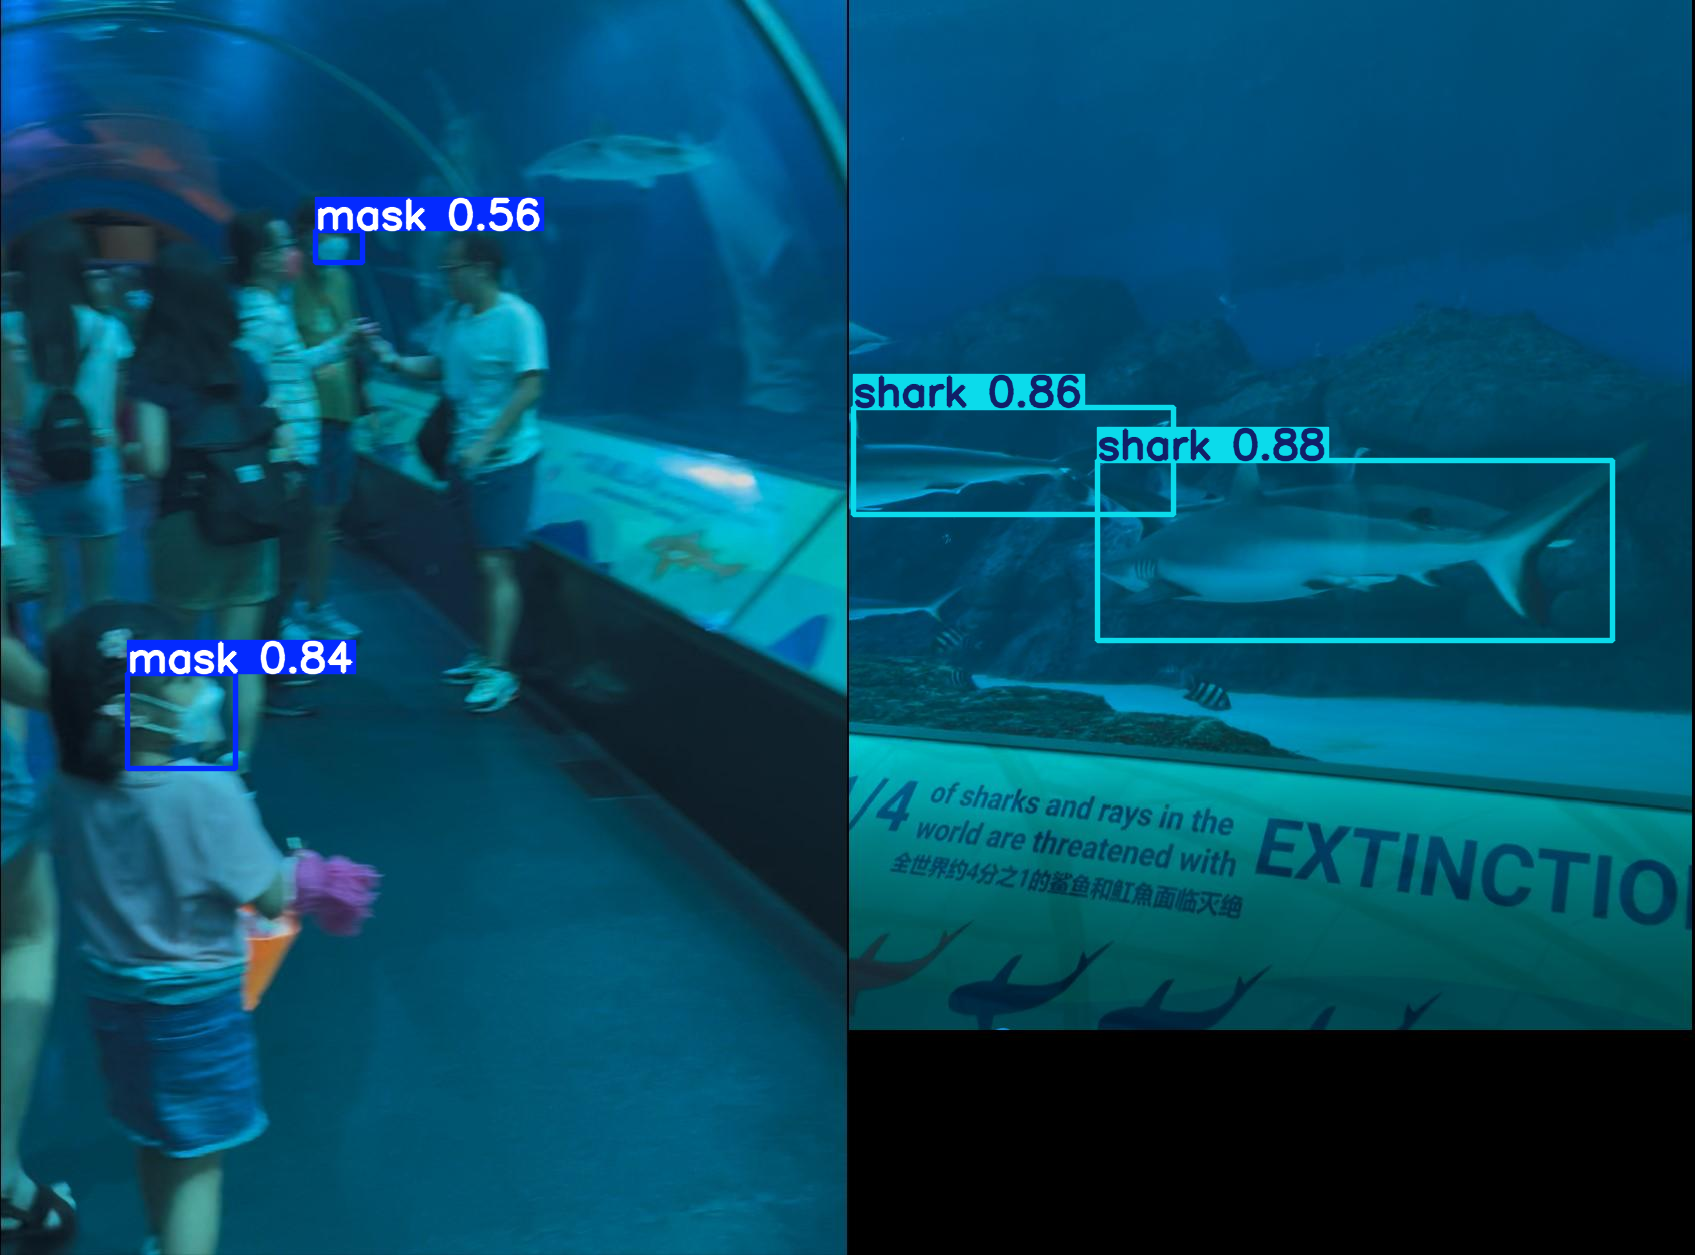

In [ ]:
import ultralytics
from ultralytics import YOLO
from PIL import Image

source = '/content/drive/MyDrive/26Dec/testimage.jpg'
#source = './samples/maskNshark.jpeg'
model = YOLO("/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model", task='detect')
result = model(source, conf=0.5, iou=0.6)

# Visualize the results
for i, r in enumerate(result):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    #  im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

## Download the Model

If you are training your model on Google Colab, you will download the exported OpenVINO model to a local PC. If you are training your model locally, then the exported model should already be
Run the following code to zip up the OpenVINO folder and download to local PC.on your local PC.


*Note: If you encountered error message "NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968", uncomment the following cell and run it.*

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
%%bash
mv ./content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model
zip -r best_int8_openvino_model.zip /content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model


  adding: content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model/ (stored 0%)
  adding: content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model/best.bin (deflated 14%)
  adding: content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model/best.xml (deflated 95%)
  adding: content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model/metadata.yaml (deflated 31%)


mv: missing destination file operand after './content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model'
Try 'mv --help' for more information.


### Video File

You need `OpenCV` to run the following code.  In your conda environment, install `opencv` for python using the following command:

```
pip3 install opencv-python
```
or
```
conda install opencv
```

Let's donwload the sample video file.

In [ ]:
# Uncomment the following lines to fix the locale issue:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!wget https://github.com/aunghlaingtun/iti107ai/blob/main/sample/MaskNshark.mp4

--2024-12-21 08:48:10--  https://github.com/aunghlaingtun/iti107ai/blob/main/sample/MaskNshark.mp4
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘MaskNshark.mp4.1’

MaskNshark.mp4.1        [ <=>                ] 220.32K  --.-KB/s    in 0.05s   

2024-12-21 08:48:11 (4.35 MB/s) - ‘MaskNshark.mp4.1’ saved [225611]



google drive rundering


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Change directory to your desired folder in Google Drive
%cd /content/drive/MyDrive/


# Step 2: Fix Locale Issue
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Step 3: Download the File from GitHub
!wget https://github.com/aunghlaingtun/iti107ai/raw/main/sample/MaskNshark.mp4 -O MaskNshark.mp4

# Step 4: Move the File to Google Drive
!mv MaskNshark.mp4 /content/drive/MyDrive/MaskNshark.mp4


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
--2024-12-21 08:51:11--  https://github.com/aunghlaingtun/iti107ai/raw/main/sample/MaskNshark.mp4
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aunghlaingtun/iti107ai/main/sample/MaskNshark.mp4 [following]
--2024-12-21 08:51:11--  https://raw.githubusercontent.com/aunghlaingtun/iti107ai/main/sample/MaskNshark.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37362687 (36M) [application/octet-stream]
Saving to: ‘MaskNshark.mp4’

MaskNshark.mp4

In [ ]:
from ultralytics import YOLO
import cv2
# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

# Load the YOLO model
model = YOLO("/content/drive/MyDrive/26Dec/Assingmet107/train/weights/best_int8_openvino_model", task='detect')

# Open the video file
video_path = "MaskNshark.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame on GPU Device 0
        results = model(frame, device="cpu")

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame using cv2_imshow
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [ ]:
from ultralytics import YOLO
import cv2

# Load the YOLO model
model = YOLO("best_int8_openvino_model", task="detect")

# Open the video file
video_path = "MaskNshark.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame on GPU Device 0
        results = model(frame, device="cpu")

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLO Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

### Detect and write to a video file

In [ ]:
from ultralytics import YOLO
import cv2
# from tqdm import tqdm
from tqdm.auto import tqdm

def write_video(video_in_filepath, video_out_filepath, model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on GPU Device 0
            results = model(frame, conf=0.9, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
from pathlib import Path
import os

video_in_file = "MaskNshark.mp4"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')
model = YOLO("best_int8_openvino_model", task="detect")
write_video(video_in_file, video_out_file, model)

  0%|          | 0/968 [00:00<?, ?it/s]

Loading best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

0: 640x640 (no detections), 248.3ms
Speed: 3.0ms preprocess, 248.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face_mask, 172.5ms
Speed: 3.7ms preprocess, 172.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face_mask, 180.3ms
Speed: 3.4ms preprocess, 180.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face_mask, 186.1ms
Speed: 2.7ms preprocess, 186.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 172.8ms
Speed: 2.1ms preprocess, 172.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 176.3ms
Speed: 2.3ms preprocess, 176.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 180.8ms
Speed: 2.3ms preprocess, 180.8ms inference, 0.7ms pos